# 이커머스 데이터 분석
- 고객 분석
- 상품 분석
- 시간 분석
- RFM 분석(고객 Segmentation)

## 데이터 설명
1. 주문 데이터
    - order_id : 주문 ID
    - customer_id : 고객 ID
    - product_id : 상품 ID
    - quantity : 구매한 수량
    - price : 상품 1개 가격(원 단위)
    - order_date : 주문 날짜 및 시간

2. 상품 데이터
    - product_id : 상품 ID
    - product_name : 상품 이름
    - price : 상품 가격 (주문 데이터 가격과 일치)

## 데이터 불러오기

In [1]:
import pandas as pd

orders = pd.read_csv('data/주문_데이터_최종.csv')
print(orders)

products = pd.read_csv('data/상품_데이터_최종.csv')
print(products)

        order_id customer_id product_id  quantity    price  \
0     ORDER10000    CUST0001      P0233         5   399915   
1     ORDER10001    CUST0001      P0088         2  1291717   
2     ORDER10002    CUST0001      P0038         1  1365584   
3     ORDER10003    CUST0001      P0032         3   734265   
4     ORDER10004    CUST0001      P0090         1   360584   
...          ...         ...        ...       ...      ...   
9719  ORDER19719    CUST1999      P0107        10   314127   
9720  ORDER19720    CUST1999      P0046        10  1072443   
9721  ORDER19721    CUST2000      P0200         3   981580   
9722  ORDER19722    CUST2000      P0290         5   880359   
9723  ORDER19723    CUST2000      P0076        10    10597   

               order_date  
0     2024-02-21 12:02:00  
1     2025-02-16 00:18:55  
2     2023-10-14 03:03:09  
3     2024-09-02 07:26:35  
4     2024-10-24 21:59:15  
...                   ...  
9719  2023-04-27 22:03:18  
9720  2023-11-04 02:10:27  
972

## 데이터 확인

In [2]:
print(orders.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     9724 non-null   object
 1   customer_id  9724 non-null   object
 2   product_id   9724 non-null   object
 3   quantity     9724 non-null   int64 
 4   price        9724 non-null   int64 
 5   order_date   9724 non-null   object
dtypes: int64(2), object(4)
memory usage: 455.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    300 non-null    object
 1   product_name  300 non-null    object
 2   price         300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB
None


## 데이터 합치기

In [3]:
p = products[['product_id', 'product_name']]

data = orders.merge(p, on = 'product_id', how = 'left')
print(data)
print(data.info())

        order_id customer_id product_id  quantity    price  \
0     ORDER10000    CUST0001      P0233         5   399915   
1     ORDER10001    CUST0001      P0088         2  1291717   
2     ORDER10002    CUST0001      P0038         1  1365584   
3     ORDER10003    CUST0001      P0032         3   734265   
4     ORDER10004    CUST0001      P0090         1   360584   
...          ...         ...        ...       ...      ...   
9719  ORDER19719    CUST1999      P0107        10   314127   
9720  ORDER19720    CUST1999      P0046        10  1072443   
9721  ORDER19721    CUST2000      P0200         3   981580   
9722  ORDER19722    CUST2000      P0290         5   880359   
9723  ORDER19723    CUST2000      P0076        10    10597   

               order_date product_name  
0     2024-02-21 12:02:00     yemdvmol  
1     2025-02-16 00:18:55     eysuptfj  
2     2023-10-14 03:03:09     hwzdkijr  
3     2024-09-02 07:26:35     dcqxozns  
4     2024-10-24 21:59:15     epbmaddw  
...      

## 데이터 컬럼 변환
- order_date를 datetime으로 변환

In [4]:
data['order_date'] = pd.to_datetime(data['order_date'])
print(data['order_date'])

0      2024-02-21 12:02:00
1      2025-02-16 00:18:55
2      2023-10-14 03:03:09
3      2024-09-02 07:26:35
4      2024-10-24 21:59:15
               ...        
9719   2023-04-27 22:03:18
9720   2023-11-04 02:10:27
9721   2023-12-17 04:15:33
9722   2024-11-04 08:33:50
9723   2023-09-20 00:39:47
Name: order_date, Length: 9724, dtype: datetime64[ns]


## 수량 분포 확인

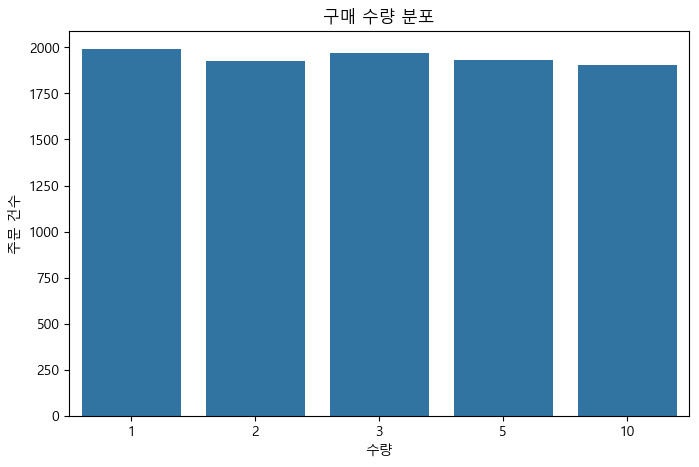

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

df = data['quantity'].value_counts().reset_index()
df.columns = ['quantity', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(x = 'quantity', y ='count', data = df)
plt.title('구매 수량 분포')
plt.xlabel('수량')
plt.ylabel('주문 건수')
plt.show()

## 가격 분포


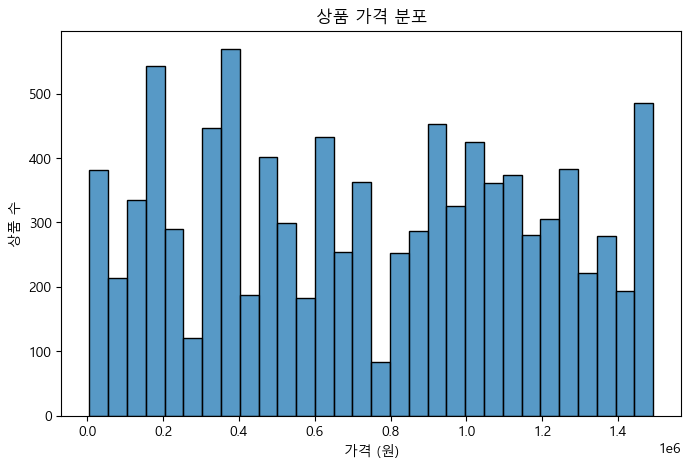

In [6]:
plt.figure(figsize = (8, 5))
sns.histplot(data['price'], bins = 30)
plt.title('상품 가격 분포')
plt.xlabel('가격 (원)')
plt.ylabel('상품 수')
plt.show()

## 주문 시간대 분석

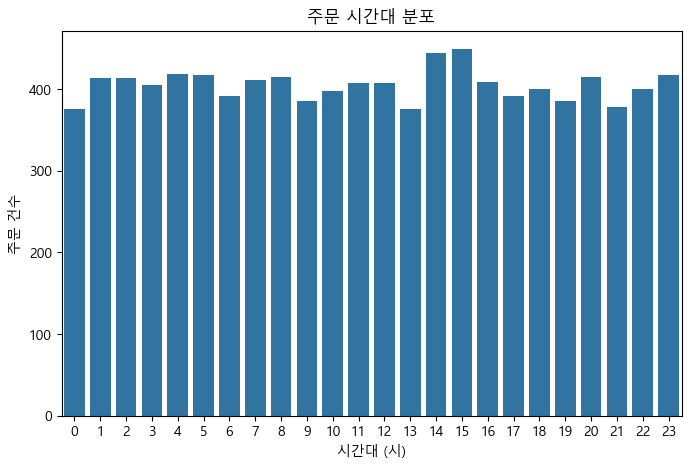

In [7]:
data['order_hour'] = data['order_date'].dt.hour

plt.figure(figsize=(8, 5))
sns.countplot(x = 'order_hour', data = data)
plt.title('주문 시간대 분포')
plt.xlabel('시간대 (시)')
plt.ylabel('주문 건수')
plt.show()

## 고객별 평균 구매 수량

In [8]:
customer_quantity = data.groupby('customer_id')['quantity'].mean().sort_values(ascending = False)
print(customer_quantity.head())

customer_id
CUST0825    10.0
CUST0788    10.0
CUST0045    10.0
CUST1957    10.0
CUST0861    10.0
Name: quantity, dtype: float64


## 상품별 판매량

In [9]:
product_quantity = data.groupby('product_id')['quantity'].sum().sort_values(ascending = False)
print(product_quantity.head())

product_id
P0281    221
P0090    215
P0241    209
P0207    208
P0290    208
Name: quantity, dtype: int64


## 인기 상품 TOP 10

In [10]:
top_products = data['product_name'].value_counts().head(10)
print(top_products)

product_name
epbmaddw    50
qafellsc    49
rdjuwiof    49
zhvnruzu    48
urcqdrcz    47
lxmjzwvl    45
xyuptdcs    44
mfugbbha    44
vudvlimz    44
wgtlmvwo    44
Name: count, dtype: int64


## 고객별 요약 지표 구하기

In [11]:
customer = data.groupby('customer_id').agg(
    total_orders = ('order_id', 'count'), # 총 주문수
    total_quantity = ('quantity', 'sum'), # 총 구매 수량
    total_spent = ('price', lambda x: (x * data.loc[x.index, 'quantity']).sum()), # 총 구매 금액
    last_order_date = ('order_date', 'max') # 최근 주문일
).reset_index()

print(customer)

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  
0    2025-02-16 00:18:55  
1    2024-09-20 10:31:10  
2    2023-12-31 18:18:42  
3    2024-10-16 15:14:57  
4    2025-03-03 22:33:58  
...                  ...  
1995 2024-12-12 23:06:14  
1996 2024-02-15 05:15:30  


In [12]:
# 분석 날짜 기준 (오늘)
analysis_date = pd.Timestamp('2025-04-09')

# recent 계산 [오늘 기준 며칠 전 구매했는지]
customer['recency'] = (analysis_date - customer['last_order_date']).dt.days + 1
print(customer)

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  recency  
0    2025-02-16 00:18:55       52  
1    2024-09-20 10:31:10      201  
2    2023-12-31 18:18:42      465  
3    2024-10-16 15:14:57      175  
4    2025-03-03 22:33:58       37  
...                  ...   

## TOP 구매 고객

In [13]:
top_customer_order = customer.sort_values('total_orders', ascending = False).head(10)
print(top_customer_order[['customer_id', 'total_orders']])

     customer_id  total_orders
1125    CUST1126            20
726     CUST0727            20
427     CUST0428            20
1435    CUST1436            20
880     CUST0881            20
1273    CUST1274            20
69      CUST0070            20
1142    CUST1143            20
689     CUST0690            20
470     CUST0471            20


## TOP 매출 고객

In [14]:
top_customer_spent = customer.sort_values('total_spent', ascending = False).head(10)
print(top_customer_spent[['customer_id', 'total_spent']])

     customer_id  total_spent
1077    CUST1078     97182978
189     CUST0190     94617457
966     CUST0967     91688917
1118    CUST1119     89961854
1533    CUST1534     89526525
1798    CUST1799     86868635
918     CUST0919     84607722
1830    CUST1831     81899478
639     CUST0640     80506961
1744    CUST1745     80167624


## RFM 점수 매기기 (1~5점 스케일)

In [15]:
customer['R'] = pd.qcut(customer['recency'], 5, labels = [5, 4, 3, 2, 1]).astype(int)
customer['F'] = pd.qcut(customer['total_orders'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5]).astype(int)
customer['M'] = pd.qcut(customer['total_spent'], 5, labels = [1, 2, 3, 4, 5]).astype(int)

print(customer)

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  recency  R  F  M  
0    2025-02-16 00:18:55       52  4  4  5  
1    2024-09-20 10:31:10      201  3  1  1  
2    2023-12-31 18:18:42      465  1  4  5  
3    2024-10-16 15:14:57      175  3  3  3  
4    2025-03-03 22

## 고객 세그먼트 나누기 (RFM으로)

In [16]:
def customer_seg(data):
    
    # VIP 고객
    if data['R'] == 5 and data['F'] == 5 and data['M'] == 5:
        return 'VIP 고객'
    
    # 충성 고객
    elif data['R'] == 5 and data['F'] in [4,5] and data['M'] in [3,4,5]:
        return '충성 고객'
    
    # 신입 고객
    elif data['R'] == 5 and data['F'] in [2,3] and data['M'] in [2,3]:
        return '신입 고객'
    
    # 잠재 VIP
    elif data['R'] == 4 and data['F'] in [4,5] and data['M'] in [3,4,5]:
        return '잠재 VIP'
    
    # 우수 고객
    elif data['R'] in [3,4] and data['F'] in [3,4] and data['M'] in [2,3,4]:
        return '우수 고객'
    
    # 일반 고객
    elif data['R'] in [2,3] and data['F'] in [2,3] and data['M'] in [2,3]:
        return '일반 고객'
    
    # 잠재 이탈 고객
    elif data['R'] == 2 and data['F'] == 2 and data['M'] in [1,2]:
        return '잠재 이탈 고객'
    
    # 이탈 위험 고객
    elif data['R'] in [1,2] and data['F'] in [4,5] and data['M'] in [3,4,5]:
        return '이탈 위험 고객'
    
    # 이탈 고객
    elif data['R'] == 1 and data['F'] in [1,2] and data['M'] in [1,2]:
        return '이탈 고객'
    
    # 그 외
    else:
        return '미분류 고객'

customer['segment'] = customer.apply(customer_seg, axis = 1)
print(customer)
print(customer['segment'].value_counts())

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  recency  R  F  M   segment  
0    2025-02-16 00:18:55       52  4  4  5    잠재 VIP  
1    2024-09-20 10:31:10      201  3  1  1    미분류 고객  
2    2023-12-31 18:18:42      465  1  4  5  이탈 위험 고객  
3    2024-10-16 15:14:5

## 세그멘트별 행동 분석

### 세그먼트별 상품 구매량 TOP 5

In [17]:
# 기존 데이터와 고객 데이터 합치기
merged = data.merge(customer[['customer_id', 'segment']], on = 'customer_id', how = 'left')
print(merged)

        order_id customer_id product_id  quantity    price  \
0     ORDER10000    CUST0001      P0233         5   399915   
1     ORDER10001    CUST0001      P0088         2  1291717   
2     ORDER10002    CUST0001      P0038         1  1365584   
3     ORDER10003    CUST0001      P0032         3   734265   
4     ORDER10004    CUST0001      P0090         1   360584   
...          ...         ...        ...       ...      ...   
9719  ORDER19719    CUST1999      P0107        10   314127   
9720  ORDER19720    CUST1999      P0046        10  1072443   
9721  ORDER19721    CUST2000      P0200         3   981580   
9722  ORDER19722    CUST2000      P0290         5   880359   
9723  ORDER19723    CUST2000      P0076        10    10597   

              order_date product_name  order_hour segment  
0    2024-02-21 12:02:00     yemdvmol          12  잠재 VIP  
1    2025-02-16 00:18:55     eysuptfj           0  잠재 VIP  
2    2023-10-14 03:03:09     hwzdkijr           3  잠재 VIP  
3    2024-09-02

In [18]:
# 세그먼트별 가장 많이 팔린 상품
product_segment = merged.groupby(['segment', 'product_id']).agg(
    total_quantity = ('quantity', 'sum'),
    total_sales = ('price', lambda x: (x * merged.loc[x.index, 'quantity']).sum())
).reset_index()

top5_product = product_segment.sort_values(['segment', 'total_quantity'], ascending = [True, False])
top5_product = top5_product.groupby('segment').head(5)

print(top5_product)

       segment product_id  total_quantity  total_sales
240     VIP 고객      P0241              95     87531385
28      VIP 고객      P0029              88     29449552
125     VIP 고객      P0126              85     11837100
273     VIP 고객      P0274              84     38249484
270     VIP 고객      P0271              83     26486379
555     미분류 고객      P0257              78     53315964
400     미분류 고객      P0101              76     82785432
479     미분류 고객      P0181              67     49794802
518     미분류 고객      P0220              62      6977294
487     미분류 고객      P0189              60     65518560
648      신입 고객      P0126              17      2367420
615      신입 고객      P0057              16     10511472
606      신입 고객      P0018              15      9405945
659      신입 고객      P0155              15     14980995
663      신입 고객      P0167              15      4670520
995      우수 고객      P0294              51     39701511
852      우수 고객      P0149              44     41016712
800      우

### 세그멘트 별 평균 구매 금액

In [19]:
avg_seg = merged.groupby('segment').agg(
    avg_spent = ('price', 'mean'),
    avg_quantity = ('quantity', 'mean')
).reset_index()

print(avg_seg)

    segment      avg_spent  avg_quantity
0    VIP 고객  747674.466308      4.214337
1    미분류 고객  742283.046226      4.443534
2     신입 고객  754642.925676      3.675676
3     우수 고객  735023.573904      4.118247
4     이탈 고객  656707.903780      3.085911
5  이탈 위험 고객  757422.981352      4.286713
6     일반 고객  779751.094086      4.026882
7    잠재 VIP  757836.693626      4.189890
8  잠재 이탈 고객  413816.760000      2.460000
9     충성 고객  707476.609720      3.873343


## 세그면트별 마케팅 전략 설계

In [20]:
# 세그먼트별 고객 수 확인
print(customer['segment'].value_counts())

segment
미분류 고객      610
우수 고객       276
이탈 고객       249
잠재 VIP      229
VIP 고객      184
일반 고객       168
충성 고객        99
이탈 위험 고객     90
신입 고객        64
잠재 이탈 고객     31
Name: count, dtype: int64


### 1. VIP 고객
- 프리미엄 전용 혜택 제공 (VIP 전용 이벤트, 사은품)
- 조기 예약, 신제품 우선 체험
- 감사 메시지 및 개인 맞춤형 선물

### 2. 충성 고객
- 멤버십 프로그램 초대 (포인트, 등급제 리워드)
- 리뷰 작성 유도 + 소정의 보상
- 구매 주기에 맞춘 맞춤형 추천 상품 제안

### 3. 신입 고객
- 첫 구매 축하 쿠폰 제공
- 환영 이메일 시리즈 발송 (브랜드 소개, 추천 상품)
- 추가 구매 유도 할인 제공 (첫 구매 이후 7일 이내)

### 4. 잠재 VIP 고객
- 재방문 유도 쿠폰 제공 (특정 기간 한정)
- 고가 제품 업셀링 캠페인
- 프리미엄 상품 관심 유도 콘텐츠 마케팅

### 5. 우수 고객
- 시즌별 추천 상품 소개
- 꾸준한 감사 메시지 & 소소한 혜택
- 상향 판매(Up-selling) 기회 마련

### 6. 일반 고객
- 가격 할인 프로모션 참여 유도
- 대중 인기 상품 중심 이메일 마케팅
- 제품 번들링 상품 제안 (2개 이상 구매시 할인 등)

### 7. 잠재 이탈 고객
- "놓치지 마세요" 긴급 할인 알림
- 이탈 방지용 리마인드 이메일 발송
- 관심 상품 기반 리타겟팅 광고

### 8. 이탈 위험 고객
- 과거 구매 기반 맞춤형 리마인드
- 휴면 고객 전용 복귀 쿠폰 제공
- "우리가 그리워요" 감성 이메일 캠페인

### 9. 이탈 고객
- 복귀를 위한 파격 할인(50% 할인 등) 제공
- 신규 상품 소식 알리기 (새로움 강조)
- 설문조사 참여 유도 → 이탈 이유 파악

### 10. 미분류 고객
- 미분류 고객이 어느 방향으로든 행동을 보이면, 다시 기존 세그먼트로 편입시킨다
- 이후, 각 세그먼트에 맞는 전략을 세운다

## 세그먼트별 LTV 분석

In [21]:
# 세그먼트별 LTV 계산
segment_ltv = customer.groupby('segment')['total_spent'].agg(['mean', 'median', 'sum', 'count']).reset_index()
segment_ltv = segment_ltv.rename(columns = {
    'mean' : '평균 구매금액',
    'median' : '중앙값 구매금액',
    'sum' : '총 구매금액',
    'count' : '고객 수',
})

segment_ltv = segment_ltv.sort_values('평균 구매금액', ascending = False)

print(segment_ltv)

    segment       평균 구매금액    중앙값 구매금액      총 구매금액  고객 수
0    VIP 고객  4.750743e+07  44270272.0  8741367206   184
7    잠재 VIP  3.154616e+07  27687174.0  7224071115   229
9     충성 고객  1.841284e+07  17567099.0  1822871360    99
5  이탈 위험 고객  1.542465e+07  13246905.0  1388218949    90
3     우수 고객  1.063217e+07   9837006.5  2934480028   276
1    미분류 고객  9.546895e+06   5043126.5  5823605845   610
6     일반 고객  6.226696e+06   6106658.5  1046085012   168
2     신입 고객  5.643824e+06   5376226.0   361204759    64
4     이탈 고객  2.029051e+06   1517637.0   505233798   249
8  잠재 이탈 고객  1.306277e+06   1329073.0    40494578    31


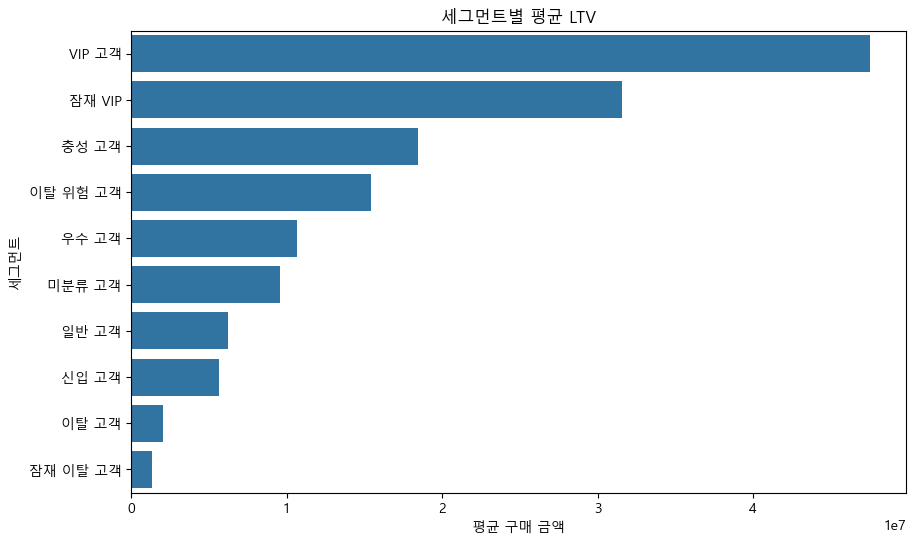

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data = segment_ltv, x = '평균 구매금액', y = 'segment')
plt.title('세그먼트별 평균 LTV')
plt.xlabel('평균 구매 금액')
plt.ylabel('세그먼트')
plt.show()

## 리텐션 분석
- **리텐션(Retention)** : 고객이 재구매하거나, 서비스를 계속 이용하는 비율

### 30일, 60일, 90일 재구매율

In [23]:
# 고객별 첫 구매일 계산
first_purchase = data.groupby('customer_id')['order_date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_order_date']

# 첫 구매일 매칭
order_with_first = pd.merge(data, first_purchase, on = 'customer_id')

# 첫 구매 후 며칠 뒤 주문했는지 
order_with_first['day_since_first'] = (order_with_first['order_date'] - order_with_first['first_order_date']).dt.days

# 첫 구매가 아닌 재구매만 필터링 (day_since_first > 0)
repurchase = order_with_first[order_with_first['day_since_first'] > 0]

# 전체 고객 수
total_customers = first_purchase['customer_id'].nunique()

# 30일, 60일, 90이내 재구매 고객 수 계산
repurchase_rates = {}
for day in [30, 60, 90]:
    repurchase_within_days = repurchase[repurchase['day_since_first'] <= day]
    repurchase_customers = repurchase_within_days['customer_id'].nunique()
    retention_rate = repurchase_customers / total_customers * 100
    repurchase_rates[day] = retention_rate

for day, rate in repurchase_rates.items():
    print(f"{day}일 이내 재구매율: {rate:.2f}%")

30일 이내 재구매율: 14.80%
60일 이내 재구매율: 25.05%
90일 이내 재구매율: 33.90%


## 세그멘트별 리텐션

In [24]:
# 고객별 첫 구매일 계산
first_purchase = data.groupby('customer_id')['order_date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_order_date']

# 첫 구매일 매칭
order_with_first = pd.merge(data, first_purchase, on = 'customer_id')

# 첫 구매 후 며칠 뒤 주문했는지 
order_with_first['day_since_first'] = (order_with_first['order_date'] - order_with_first['first_order_date']).dt.days

# 첫 구매가 아닌 재구매만 필터링 (day_since_first > 0)
repurchase = order_with_first[order_with_first['day_since_first'] > 0]

# 30일, 60일, 90일 안에 재구매 여부 계산
re_30 = repurchase[repurchase['day_since_first'] <= 30]
re_60 = repurchase[repurchase['day_since_first'] <= 60]
re_90 = repurchase[repurchase['day_since_first'] <= 90]

# 고객별 재구매 여부 (있으면 1, 없으면 0)
re_flag = first_purchase[['customer_id']].copy()
re_flag['re_30'] = re_flag['customer_id'].isin(re_30['customer_id']).astype(int)
re_flag['re_60'] = re_flag['customer_id'].isin(re_60['customer_id']).astype(int)
re_flag['re_90'] = re_flag['customer_id'].isin(re_90['customer_id']).astype(int)

# 세그먼트 붙이기
re_flag = pd.merge(re_flag, customer[['customer_id', 'segment']].drop_duplicates(), on = 'customer_id', how = 'left')

# 세그먼트별 평균 재구매율 
retention_by_segment = re_flag.groupby('segment')[['re_30', 're_60', 're_90']].mean().reset_index()

# 결과
print(retention_by_segment)

    segment     re_30     re_60     re_90
0    VIP 고객  0.385870  0.619565  0.793478
1    미분류 고객  0.101639  0.175410  0.239344
2     신입 고객  0.015625  0.062500  0.109375
3     우수 고객  0.119565  0.188406  0.264493
4     이탈 고객  0.016064  0.036145  0.052209
5  이탈 위험 고객  0.233333  0.411111  0.588889
6     일반 고객  0.065476  0.136905  0.226190
7    잠재 VIP  0.344978  0.519651  0.663755
8  잠재 이탈 고객  0.032258  0.096774  0.129032
9     충성 고객  0.131313  0.333333  0.464646


<Figure size 1200x600 with 0 Axes>

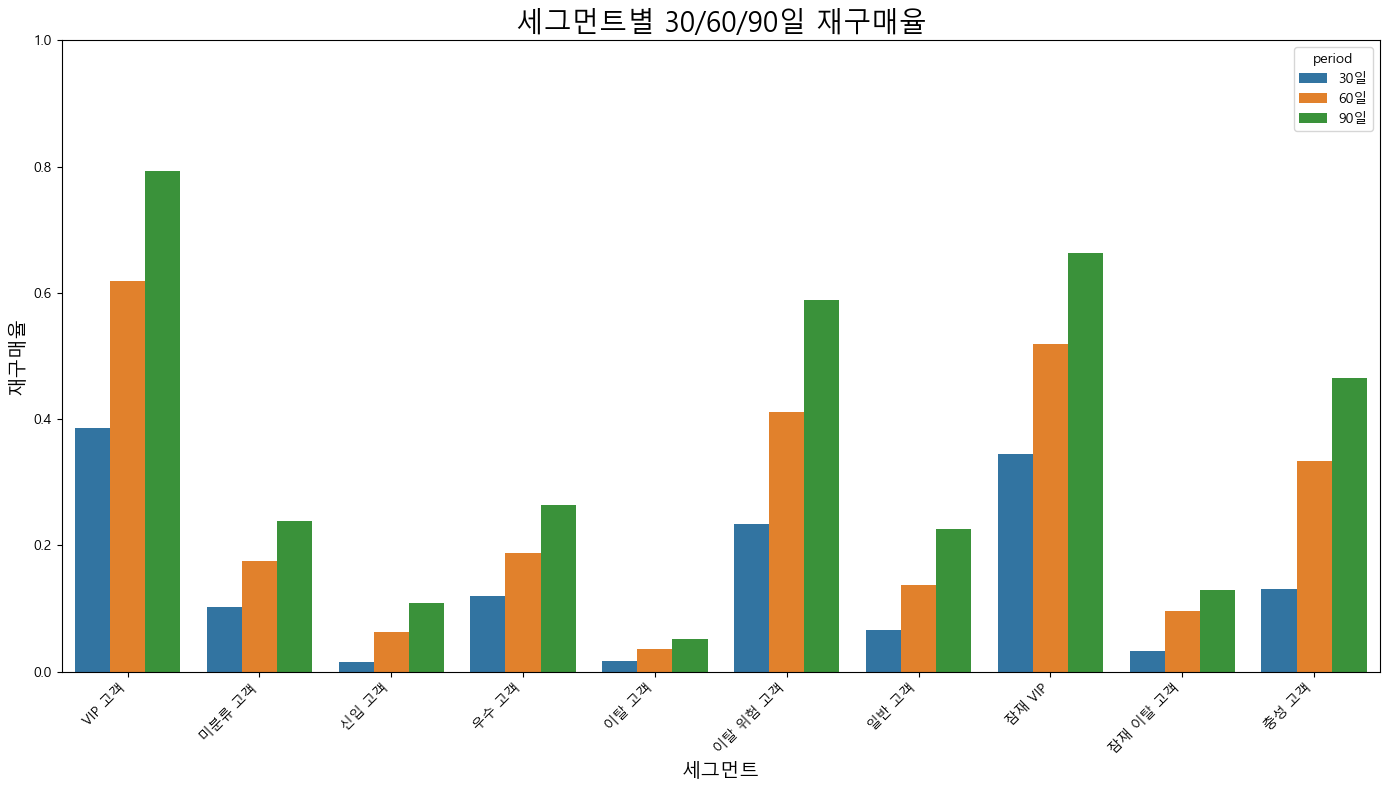

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))

retention_melted = retention_by_segment.melt(id_vars='segment', 
                                              value_vars=['re_30', 're_60', 're_90'], 
                                              var_name='period', 
                                              value_name='retention_rate')

retention_melted['period'] = retention_melted['period'].map({
    're_30': '30일',
    're_60': '60일',
    're_90': '90일'
})

plt.figure(figsize=(14, 8))
sns.barplot(data=retention_melted, x='segment', y='retention_rate', hue='period')

plt.title('세그먼트별 30/60/90일 재구매율', fontsize=20)
plt.xlabel('세그먼트', fontsize=14)
plt.ylabel('재구매율', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## 이탈할 고객 vs 구매할 고객 분류 모델링(90일 이내)

In [26]:
print(customer)

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  recency  R  F  M   segment  
0    2025-02-16 00:18:55       52  4  4  5    잠재 VIP  
1    2024-09-20 10:31:10      201  3  1  1    미분류 고객  
2    2023-12-31 18:18:42      465  1  4  5  이탈 위험 고객  
3    2024-10-16 15:14:5

In [27]:
print(data)

        order_id customer_id product_id  quantity    price  \
0     ORDER10000    CUST0001      P0233         5   399915   
1     ORDER10001    CUST0001      P0088         2  1291717   
2     ORDER10002    CUST0001      P0038         1  1365584   
3     ORDER10003    CUST0001      P0032         3   734265   
4     ORDER10004    CUST0001      P0090         1   360584   
...          ...         ...        ...       ...      ...   
9719  ORDER19719    CUST1999      P0107        10   314127   
9720  ORDER19720    CUST1999      P0046        10  1072443   
9721  ORDER19721    CUST2000      P0200         3   981580   
9722  ORDER19722    CUST2000      P0290         5   880359   
9723  ORDER19723    CUST2000      P0076        10    10597   

              order_date product_name  order_hour  
0    2024-02-21 12:02:00     yemdvmol          12  
1    2025-02-16 00:18:55     eysuptfj           0  
2    2023-10-14 03:03:09     hwzdkijr           3  
3    2024-09-02 07:26:35     dcqxozns          

### 데이터 정리

In [28]:
last_orders = customer[['customer_id', 'last_order_date']]

df = data.merge(last_orders, on = 'customer_id', how = 'left')

print(df)

        order_id customer_id product_id  quantity    price  \
0     ORDER10000    CUST0001      P0233         5   399915   
1     ORDER10001    CUST0001      P0088         2  1291717   
2     ORDER10002    CUST0001      P0038         1  1365584   
3     ORDER10003    CUST0001      P0032         3   734265   
4     ORDER10004    CUST0001      P0090         1   360584   
...          ...         ...        ...       ...      ...   
9719  ORDER19719    CUST1999      P0107        10   314127   
9720  ORDER19720    CUST1999      P0046        10  1072443   
9721  ORDER19721    CUST2000      P0200         3   981580   
9722  ORDER19722    CUST2000      P0290         5   880359   
9723  ORDER19723    CUST2000      P0076        10    10597   

              order_date product_name  order_hour     last_order_date  
0    2024-02-21 12:02:00     yemdvmol          12 2025-02-16 00:18:55  
1    2025-02-16 00:18:55     eysuptfj           0 2025-02-16 00:18:55  
2    2023-10-14 03:03:09     hwzdkijr  

In [29]:
df['days_after_last'] = (df['last_order_date'] - df['order_date']).dt.days
reorder_within_90 = df[(df['days_after_last'] > 0) & (df['days_after_last'] <= 90)]

# 고객별 90일 이내 재구매 여부
reorder_flag = reorder_within_90.groupby('customer_id').size().reset_index(name = 'reorder_count')
reorder_flag['is_churn'] = 0 # 0 = 미이탈
# print(reorder_flag)

# 재구매 없는 고객 기본값 1로 설정
customer_df = customer.merge(reorder_flag[['customer_id', 'is_churn']], on = 'customer_id', how = 'left')
customer_df['is_churn'] = customer_df['is_churn'].fillna(1).astype(int) # NaN이면 이탈 -> 1

print(customer_df[['customer_id', 'is_churn']])

     customer_id  is_churn
0       CUST0001         1
1       CUST0002         1
2       CUST0003         1
3       CUST0004         0
4       CUST0005         1
...          ...       ...
1995    CUST1996         0
1996    CUST1997         1
1997    CUST1998         0
1998    CUST1999         0
1999    CUST2000         1

[2000 rows x 2 columns]


In [30]:
print(customer_df['is_churn'].value_counts())

is_churn
1    1331
0     669
Name: count, dtype: int64


### 변수 선택 및 모델 학습

In [31]:
print(customer_df)

     customer_id  total_orders  total_quantity  total_spent  \
0       CUST0001            10              39     30755857   
1       CUST0002             1               1       142976   
2       CUST0003             5              24     26198004   
3       CUST0004             3              16      8351007   
4       CUST0005             3               6      2495302   
...          ...           ...             ...          ...   
1995    CUST1996             3               5      3558875   
1996    CUST1997             1               1      1116925   
1997    CUST1998             3              14     10774955   
1998    CUST1999             5              29     18056417   
1999    CUST2000             3              18      7452505   

         last_order_date  recency  R  F  M   segment  is_churn  
0    2025-02-16 00:18:55       52  4  4  5    잠재 VIP         1  
1    2024-09-20 10:31:10      201  3  1  1    미분류 고객         1  
2    2023-12-31 18:18:42      465  1  4  5  이탈 위

In [32]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      2000 non-null   object        
 1   total_orders     2000 non-null   int64         
 2   total_quantity   2000 non-null   int64         
 3   total_spent      2000 non-null   int64         
 4   last_order_date  2000 non-null   datetime64[ns]
 5   recency          2000 non-null   int64         
 6   R                2000 non-null   int64         
 7   F                2000 non-null   int64         
 8   M                2000 non-null   int64         
 9   segment          2000 non-null   object        
 10  is_churn         2000 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 172.0+ KB
None


In [33]:
columns = ['total_orders', 'total_quantity', 'total_spent', 'recency', 'R', 'F', 'M', 'segment']
X = customer_df[columns]
y = customer_df['is_churn']

X_dum = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_dum, y, stratify = y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 0)
# print(X_train.shape, X_val.shape, X_test.shape)

# RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced',
                               random_state=0
                              )
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=0)

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

y_proba_train = model.predict_proba(X_train)[:, 1]
y_proba_val = model.predict_proba(X_val)[:, 1]

print(classification_report(y_train, y_pred_train))
print('accuracy_train: ', accuracy_score(y_train, y_pred_train))
print('roc-auc_train: ', roc_auc_score(y_train, y_proba_train))

print(classification_report(y_val, y_pred_val))
print('accuracy_val: ', accuracy_score(y_val, y_pred_val))
print('roc-auc_val: ', roc_auc_score(y_val, y_proba_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

accuracy_train:  1.0
roc-auc_train:  1.0
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       134
           1       0.81      0.83      0.82       266

    accuracy                           0.76       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.75      0.76      0.76       400

accuracy_val:  0.7575
roc-auc_val:  0.8289894512400403


In [35]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0, objective = 'binary:logistic', scale_pos_weight = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
y_pred_train = xgb.predict(X_train)
y_pred_val = xgb.predict(X_val)

y_proba_train = xgb.predict_proba(X_train)[:, 1]
y_proba_val = xgb.predict_proba(X_val)[:, 1]

print(classification_report(y_train, y_pred_train))
print('accuracy_train: ', accuracy_score(y_train, y_pred_train))
print('roc-auc_train: ', roc_auc_score(y_train, y_proba_train))

print(classification_report(y_val, y_pred_val))
print('accuracy_val: ', accuracy_score(y_val, y_pred_val))
print('roc-auc_val: ', roc_auc_score(y_val, y_proba_val))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       401
           1       0.98      1.00      0.99       799

    accuracy                           0.99      1200
   macro avg       0.99      0.98      0.99      1200
weighted avg       0.99      0.99      0.99      1200

accuracy_train:  0.9875
roc-auc_train:  0.9999360172784558
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       134
           1       0.80      0.88      0.84       266

    accuracy                           0.78       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.77      0.78      0.77       400

accuracy_val:  0.775
roc-auc_val:  0.8347267422287061


### XGB모델로 GridSearchCV 진행
- XGB모델이 조금 더 성능이 괜찮음

In [37]:
from sklearn.model_selection import GridSearchCV
import numpy as np

neg, pos = np.bincount(y_train)
scale_pos_weight = neg/pos

xgb = XGBClassifier(
    objective = 'binary:logistic',
    random_state = 0,
    scale_pos_weight = scale_pos_weight
)

param_grid = {
    'max_depth' : [3, 4, 5, 6],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'n_estimators' : [100, 200, 300],
    'subsample' : [0.8, 1], 
    'gamma' : [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator = xgb, 
    param_grid = param_grid, 
    scoring = 'roc_auc', 
    cv = 4, 
    verbose = 2,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='roc_auc', verbose=2)

In [38]:
print('최적 파라미터: ', grid_search.best_params_)
print('best_score: ', grid_search.best_score_)

최적 파라미터:  {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
best_score:  0.8612770734862432


### model 평가

In [39]:
best_model = grid_search.best_estimator_

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)

y_proba_train = best_model.predict_proba(X_train)[:, 1]
y_proba_val = best_model.predict_proba(X_val)[:, 1]

print(classification_report(y_train, y_pred_train))
print('accuracy_train: ', accuracy_score(y_train, y_pred_train))
print('roc-auc_train: ', roc_auc_score(y_train, y_proba_train))

print(classification_report(y_val, y_pred_val))
print('accuracy_val: ', accuracy_score(y_val, y_pred_val))
print('roc-auc_val: ', roc_auc_score(y_val, y_proba_val))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       401
           1       0.88      0.78      0.83       799

    accuracy                           0.79      1200
   macro avg       0.76      0.79      0.77      1200
weighted avg       0.80      0.79      0.79      1200

accuracy_train:  0.785
roc-auc_train:  0.8842068795470648
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       134
           1       0.88      0.77      0.82       266

    accuracy                           0.78       400
   macro avg       0.76      0.78      0.77       400
weighted avg       0.80      0.78      0.78       400

accuracy_val:  0.78
roc-auc_val:  0.8490629558972057


### 최종 테스트

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
y_pred = best_model.predict(X_test)

y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('roc-auc: ', roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       134
           1       0.89      0.76      0.82       266

    accuracy                           0.77       400
   macro avg       0.75      0.78      0.76       400
weighted avg       0.80      0.77      0.78       400

accuracy:  0.7725
roc-auc:  0.8739479295253058


### Confusion Matrix

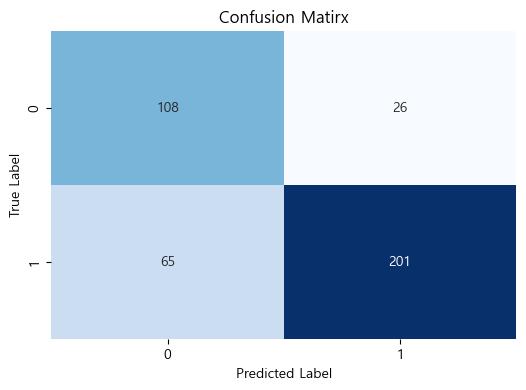

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matirx')
plt.show()

### Feature Importance(XGB)

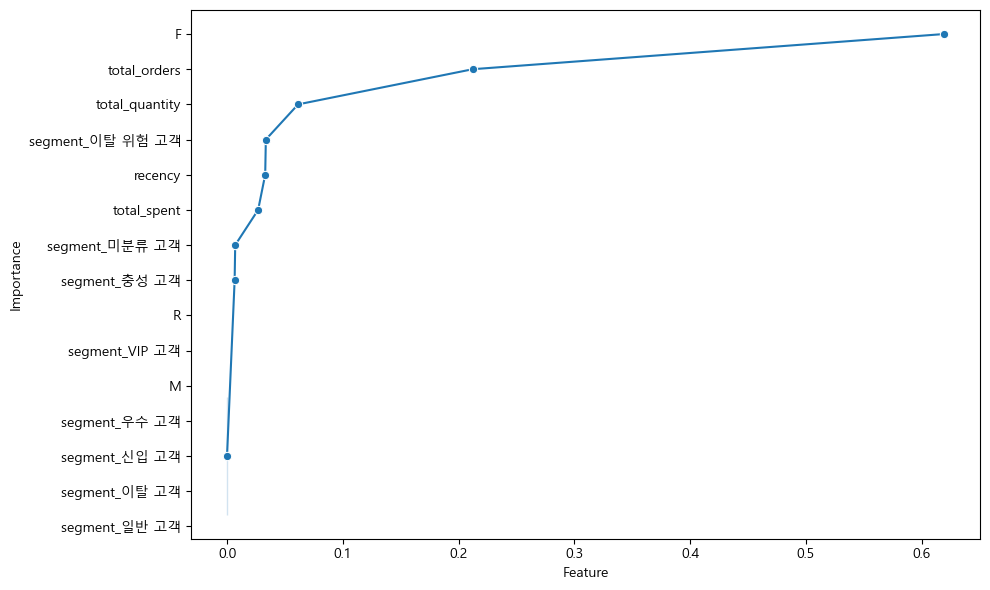

In [43]:
importances = best_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'feature' : feature_names,
    'importance' : importances
}).sort_values('importance', ascending = False)

plt.figure(figsize=(10, 6))
sns.lineplot(data = feature_importance_df, x = 'importance', y = 'feature', marker = 'o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### ROC Curve 확인

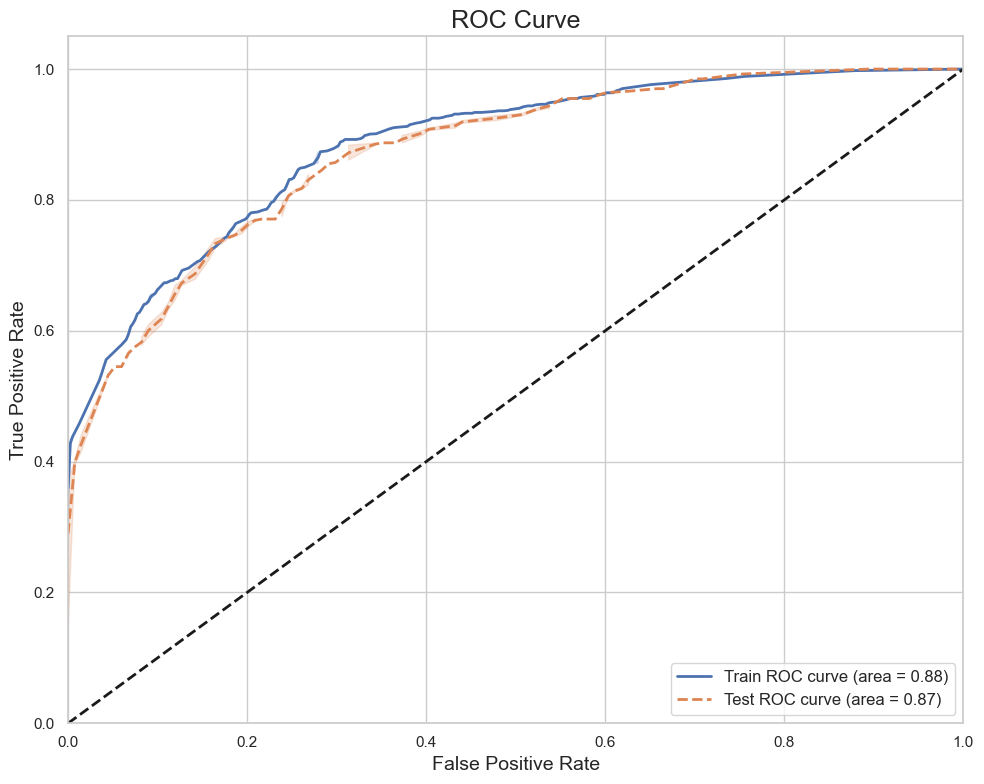

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train, Test ROC Curve용 데이터
y_train_pred_proba = best_model.predict_proba(X_train)[:,1]
y_test_pred_proba = best_model.predict_proba(X_test)[:,1]

# ROC Curve 계산
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# 시각화
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Train curve
sns.lineplot(x=fpr_train, y=tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})', linewidth=2)

# Test curve
sns.lineplot(x=fpr_test, y=tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})', linewidth=2, linestyle="--")

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()